### Analysing water masses

Download the years 2020 of the ['potential temperature'](https://psl.noaa.gov/cgi-bin/db_search/DBListFiles.pl?did=98&tid=83478&vid=1913) and ['salinity'](https://psl.noaa.gov/cgi-bin/db_search/DBListFiles.pl?did=98&tid=83478&vid=1914) from the GODAS website at https://psl.noaa.gov/data/gridded/data.godas.html (via 'List of *.nc files'>'See list'>'Save Link as'). 

Then, load the modules as

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import gsw

Now open the the temperature and salinity files for 2020 (where of course `datadir` should point to the directory where you saved the GODAS data)

In [2]:
datadir ='/Users/erik/Downloads/'
T = xr.open_dataset(datadir+'pottmp.2020.nc')
S = xr.open_dataset(datadir+'salt.2020.nc')

### Assignment

**a)** Use plt.scatter to plot all data points in a $\Theta S$-diagram. Note that this may take a while to plot, since there are a lot of datapoints. Make sure that your axes are in $^\circ$C and g/kg for temperature and salinty, as is custom in physical oceanography, by simple arithmetic operations on the vlaues in the `T` and `S` DataArrays.

You can add contours of $\sigma_0$ to the plot by using the `gsw` again, as in A02_Q2

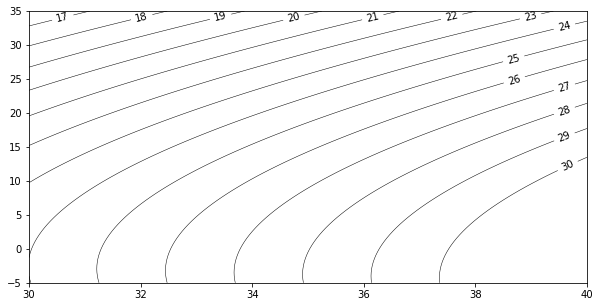

In [4]:
temp = np.linspace(-5, 35, 80)
salt = np.linspace(30, 40, 100)

X, Y = np.meshgrid(temp, salt)

sigma0 = gsw.density.sigma0(Y, X)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
CS = ax.contour(salt, temp, sigma0.T, np.arange(0, 31, 1), colors='k', linewidths=0.5)
ax.clabel(CS, inline=1, fontsize=10, fmt='%d');

**b)** There are so many observations here that it may be difficult to interpret the plot. To make it easier to interpret the full $\Theta S$-structure of the ocean, create a 2-dimensional histogram using [`plt.hist2d`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html). Because the DataArrays contain Nans (on land), it is important to explicitly set the range using e.g. `range=[[30, 40], [-5, 35]]`. Increase the number of bins to e.g. 50 in both $\Theta$ and $S$. If you want, you can apply a logairhmic mapping using `norm=colors.LogNorm()`. Also plot the $\sigma_0$ isopycnals using the code snippet above.

**c)** We can of course also look at the vertical profile of $\Theta$ and $S$ at one location, and one time. Pick a location somewhere in the Atlantic Ocean (using `isel(time=0).sel(lon=X, lat=Y, method='nearest')` where you subsitutde `X` and `Y` with the longitude and latitude you want to explore; note that the longitude in the GODAS dataset run from 0 to 360). Note that you can change the extent of the axes by using `ax.set_xlim` and `ax.set_ylim`, so you can 'zoom in' on the profile itself.

**d)** Now compare your profile to those within the source regions of some of the water masses in the Labrador Sea and the South Atlantic, by choosing locations there too and plotting these $\Theta S$-curves on the same plot. Use `label=` and `ax.legend()` to label your curves. What do you see? How do the curves differ?